In [1]:
!pip install nltk


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



📊 Statistical Analysis:
Kurtosis of Review Length: 6.92
Skewness of Review Length: 2.20


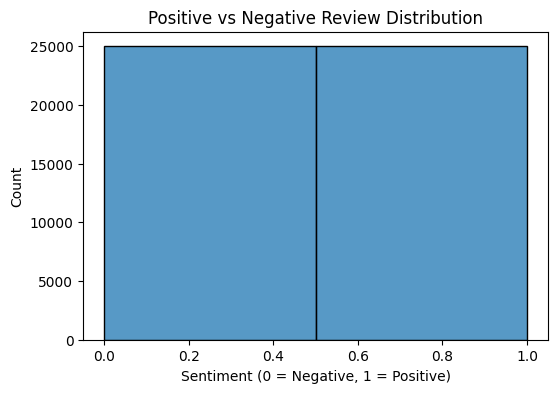

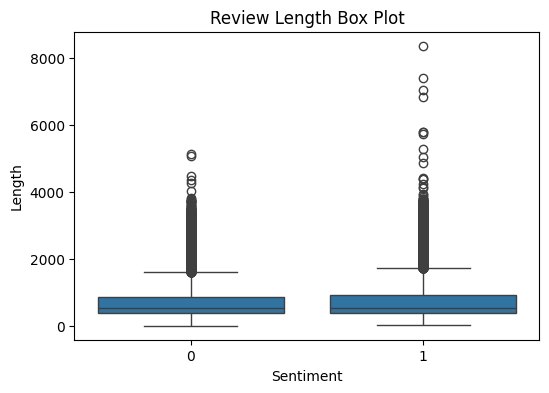


📈 Model Performance:
Logistic Regression Accuracy: 0.88
Naïve Bayes Accuracy: 0.84
Random Forest Accuracy: 0.84


<ipython-input-8-74c57e9f9352>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


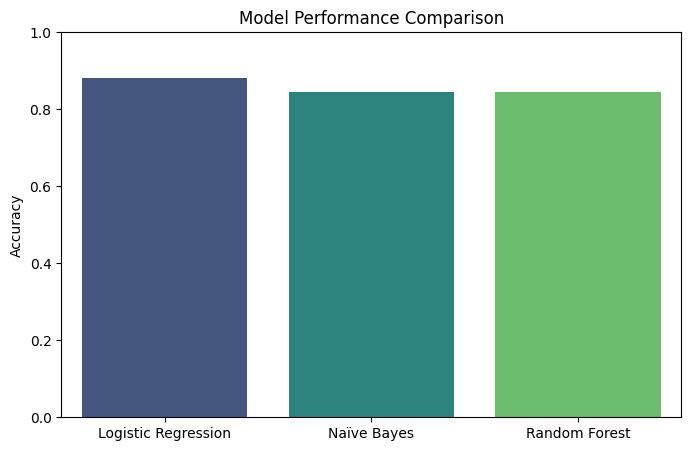

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from scipy.stats import kurtosis, skew


nltk.download("stopwords")


stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML
    text = text.lower()  # Lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special chars
    tokens = text.split()  # Basic tokenization
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)


df = pd.read_csv("/content/IMDB Dataset.csv")
df.columns = ["review", "sentiment"]
df["label"] = df["sentiment"].map({"positive": 1, "negative": 0})


df["cleaned_review"] = df["review"].apply(preprocess_text)


df["review_length"] = df["cleaned_review"].apply(len)
kurt = kurtosis(df["review_length"])
skewness = skew(df["review_length"])
print("\n📊 Statistical Analysis:")
print(f"Kurtosis of Review Length: {kurt:.2f}")
print(f"Skewness of Review Length: {skewness:.2f}")


plt.figure(figsize=(6, 4))
sns.histplot(df["label"], bins=2)
plt.title("Positive vs Negative Review Distribution")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["label"], y=df["review_length"])
plt.title("Review Length Box Plot")
plt.xlabel("Sentiment")
plt.ylabel("Length")
plt.show()


vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df["cleaned_review"])
y = df["label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naïve Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

model_accuracies = {}
print("\n📈 Model Performance:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")


plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()
